In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\Rahul Aggarwal\Desktop\FIFA_20.csv")
# df.head()

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sofifa_id,18278.0,219738.864482,27960.200461,768.0,204445.5,226165.0,240795.75,252905.0
age,18278.0,25.283291,4.656964,16.0,22.0,25.0,29.00,42.0
height_cm,18278.0,181.362184,6.756961,156.0,177.0,181.0,186.00,205.0
weight_kg,18278.0,75.276343,7.047744,50.0,70.0,75.0,80.00,110.0
overall,18278.0,66.244994,6.949953,48.0,62.0,66.0,71.00,94.0
...,...,...,...,...,...,...,...,...
goalkeeping_diving,18278.0,16.572765,17.738069,1.0,8.0,11.0,14.00,90.0
goalkeeping_handling,18278.0,16.354853,16.996925,1.0,8.0,11.0,14.00,92.0
goalkeeping_kicking,18278.0,16.212934,16.613665,1.0,8.0,11.0,14.00,93.0
goalkeeping_positioning,18278.0,16.368038,17.136497,1.0,8.0,11.0,14.00,91.0


In [6]:
for i in range(25) : # len(df)
  print(df.loc[i, "short_name"], df.loc[i, "club"])

L. Messi FC Barcelona
Cristiano Ronaldo Juventus
Neymar Jr Paris Saint-Germain
J. Oblak Atlético Madrid
E. Hazard Real Madrid
K. De Bruyne Manchester City
M. ter Stegen FC Barcelona
V. van Dijk Liverpool
L. Modrić Real Madrid
M. Salah Liverpool
K. Mbappé Paris Saint-Germain
K. Koulibaly Napoli
H. Kane Tottenham Hotspur
Alisson Liverpool
De Gea Manchester United
N. Kanté Chelsea
G. Chiellini Juventus
S. Agüero Manchester City
Sergio Ramos Real Madrid
L. Suárez FC Barcelona
R. Lewandowski FC Bayern München
Sergio Busquets FC Barcelona
A. Griezmann FC Barcelona
P. Dybala Juventus
P. Pogba Manchester United


<h1> Data Cleaning </h1>

In [7]:
df.drop(df.iloc[:, 78:104], inplace = True, axis = 1) 

In [8]:
df = df.drop(['sofifa_id', 'player_url', 'long_name', 'dob', 'real_face',
         'player_positions', 'work_rate', 'player_tags', 'loaned_from',
         'joined', 'contract_valid_until', 'nation_position',
         'nation_jersey_number', 'player_traits'], axis = 1)

In [9]:
sub_count = 0

for i in range(len(df)):
  if (df.loc[i, 'team_position'] == 'SUB'):
        sub_count += 1
        # print(df.loc[i, "short_name"], df.loc[i, "club"], df.loc[i, 'team_position'])
        

print('Total subs :', sub_count)

Total subs : 7820


In [10]:
# Dropping subs to analyze only starting 11 team players
starting_eleven_df = df[df['team_position'] != 'SUB']

print(df.shape)
print(starting_eleven_df.shape)

(18278, 64)
(10458, 64)


In [11]:
starting_eleven_df.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,88,91,34,27,22,11,12,6,8,8


In [12]:
starting_eleven_df = starting_eleven_df.reset_index(drop = True)

In [50]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [51]:
cols = ['height_cm', 'overall']

df_test = df[cols]


x = df_test['height_cm']
y = df_test['overall']
# Generate indicators for the data points
obj_names = []
for i in range(len(df)):
    obj = "Object " + str(i)
    obj_names.append(obj)

data = pd.DataFrame({
    'Object': obj_names,
    'X_value': x,
    'Y_value': y
})

print(df.head())

          short_name  age  height_cm  weight_kg nationality  \
0           L. Messi   32        170         72   Argentina   
1  Cristiano Ronaldo   34        187         83    Portugal   
2          Neymar Jr   27        175         68      Brazil   
3           J. Oblak   26        188         87    Slovenia   
4          E. Hazard   28        175         74     Belgium   

                  club  overall  potential  value_eur  wage_eur  ...  \
0         FC Barcelona       94         94   95500000    565000  ...   
1             Juventus       93         93   58500000    405000  ...   
2  Paris Saint-Germain       92         92  105500000    290000  ...   
3      Atlético Madrid       91         93   77500000    125000  ...   
4          Real Madrid       91         91   90000000    470000  ...   

  mentality_penalties  mentality_composure  defending_marking  \
0                  75                   96                 33   
1                  85                   95                

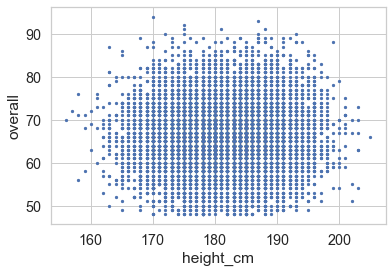

In [52]:
plt.scatter(x, y, s = 5)
plt.xlabel('height_cm')
plt.ylabel('overall')
plt.show()

In [53]:
# Initialize the centroids
# (height_cm, overall)
c1 = (20, 55)
c2 = (30, 85)
c3 = (35, 60)

In [54]:
# Function to calculate distances of all points from a particular centroid
def calculate_distance(centroid, X, Y):
    distances = []
    
    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid
    
    # Iterate over the data points and calculate the distance using the given formula
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
    
    return distances

In [55]:
# Calculate the distance and assign them to the DataFrame accordingly
data['C1_Distance'] = calculate_distance(c1, data.X_value, data.Y_value)
data['C2_Distance'] = calculate_distance(c2, data.X_value, data.Y_value)
data['C3_Distance'] = calculate_distance(c3, data.X_value, data.Y_value)

# Preview the data
data.head()

,Object,X_value,Y_value,C1_Distance,C2_Distance,C3_Distance
0,Object 0,170,94,154.987096,140.288987,139.215660
1,Object 1,187,93,171.268795,157.203690,155.540991
2,Object 2,175,92,159.354950,145.168867,143.610585
3,Object 3,188,91,171.813853,158.113883,156.108936
4,Object 4,175,91,159.125736,145.124085,143.391074


In [56]:
# Get the minimum distance centroids
data['Cluster'] = data[['C1_Distance', 'C2_Distance', 'C3_Distance']].apply(np.argmin, axis =1)

# Map the centroids accordingly and rename them
data['Cluster'] = data['Cluster'].map({'C1_Distance': 'C1', 'C2_Distance': 'C2', 'C3_Distance': 'C3'})

# Get a preview of the data
data.head(5)

,Object,X_value,Y_value,C1_Distance,C2_Distance,C3_Distance,Cluster
0,Object 0,170,94,154.987096,140.288987,139.215660,NaN
1,Object 1,187,93,171.268795,157.203690,155.540991,NaN
2,Object 2,175,92,159.354950,145.168867,143.610585,NaN
3,Object 3,188,91,171.813853,158.113883,156.108936,NaN
4,Object 4,175,91,159.125736,145.124085,143.391074,NaN


In [58]:
# Get the number of data points in the clusters
from collections import Counter

label_counts = Counter(data['Cluster'].values)
label_counts.most_common()

[(nan, 18278)]

In [59]:
# Calculate the coordinates of the new centroid from cluster 1
x_new_centroid1 = data[data['Cluster']=='C1']['X_value'].mean()
y_new_centroid1 = data[data['Cluster']=='C1']['Y_value'].mean()

# Calculate the coordinates of the new centroid from cluster 2
x_new_centroid2 = data[data['Cluster']=='C2']['X_value'].mean()
y_new_centroid2 = data[data['Cluster']=='C2']['Y_value'].mean()

# Calculate the coordinates of the new centroid from cluster 3
x_new_centroid3 = data[data['Cluster']=='C3']['X_value'].mean()
y_new_centroid3 = data[data['Cluster']=='C3']['Y_value'].mean()

# Print the coordinates of the new centroids
print('Centroid 1 ({}, {})'.format(x_new_centroid1, y_new_centroid1))
print('Centroid 2 ({}, {})'.format(x_new_centroid2, y_new_centroid2))
print('Centroid 3 ({}, {})'.format(x_new_centroid3, y_new_centroid3))

Centroid 1 (nan, nan)
Centroid 2 (nan, nan)
Centroid 3 (nan, nan)


In [60]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

# Specify the number of clusters (3) and fit the data x,y which is in df_test
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_test)

In [61]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[175.2735    ,  69.70783333],
       [187.50409339,  69.53805337],
       [180.66173882,  58.7655755 ]])

In [62]:
# Get the cluster labels
kmeans.labels_

array([0, 1, 0, ..., 2, 2, 2])

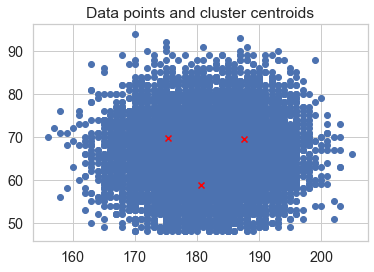

In [63]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(x, y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [64]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(df_test, kmeans.labels_))

0.33212865325758223


For n_clusters = 2 The average silhouette_score is : 0.31439148136232936
For n_clusters = 3 The average silhouette_score is : 0.32960162273585164
For n_clusters = 4 The average silhouette_score is : 0.3236456055663265
For n_clusters = 5 The average silhouette_score is : 0.3160358292530072
For n_clusters = 6 The average silhouette_score is : 0.3296999780894532
For n_clusters = 7 The average silhouette_score is : 0.3301543769350669
For n_clusters = 8 The average silhouette_score is : 0.3195435887582073
For n_clusters = 9 The average silhouette_score is : 0.31825802400323044
For n_clusters = 10 The average silhouette_score is : 0.31933855159109953


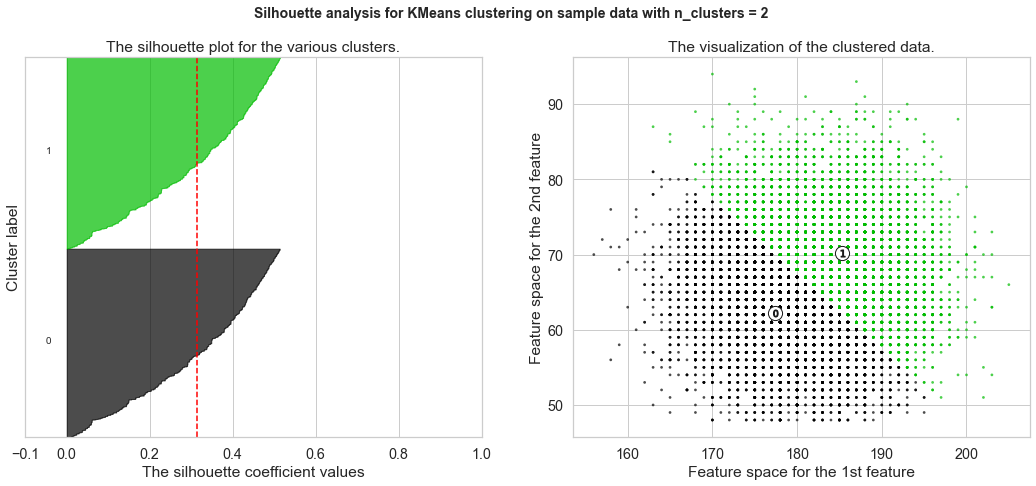

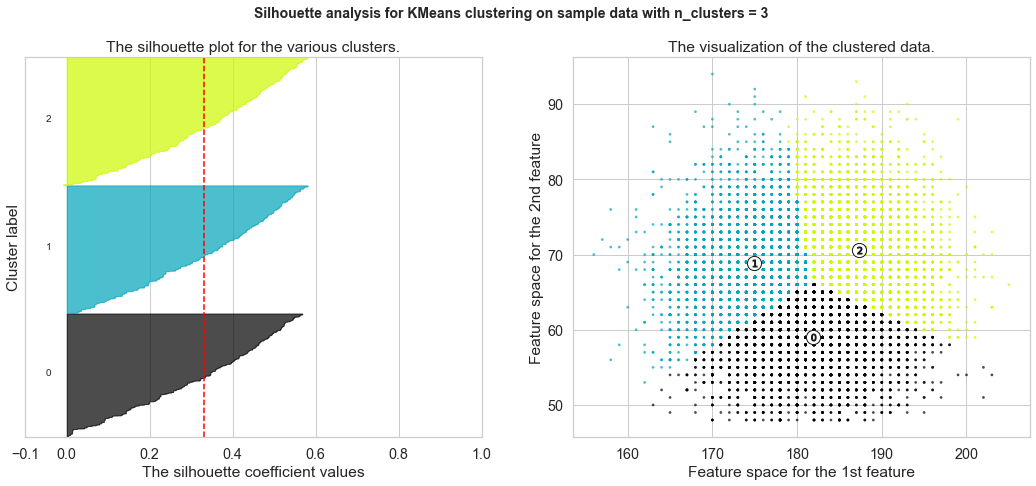

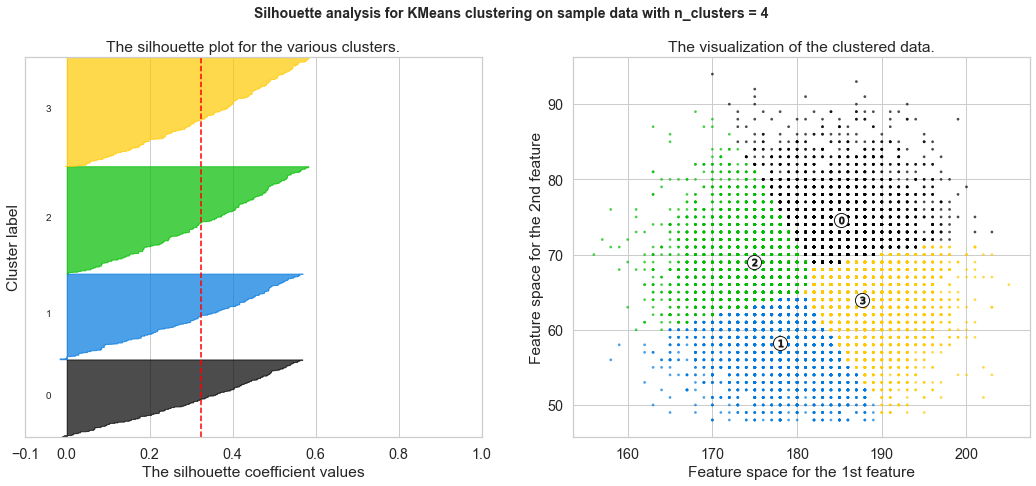

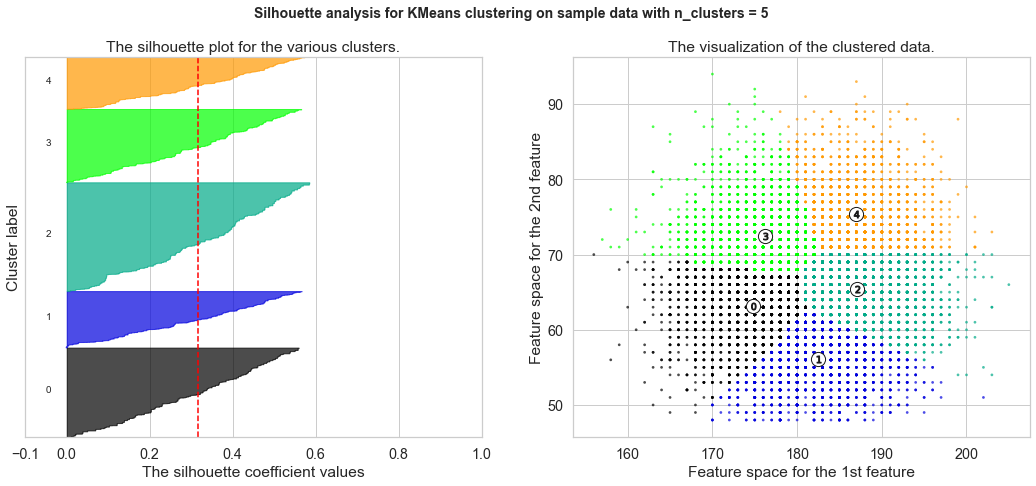

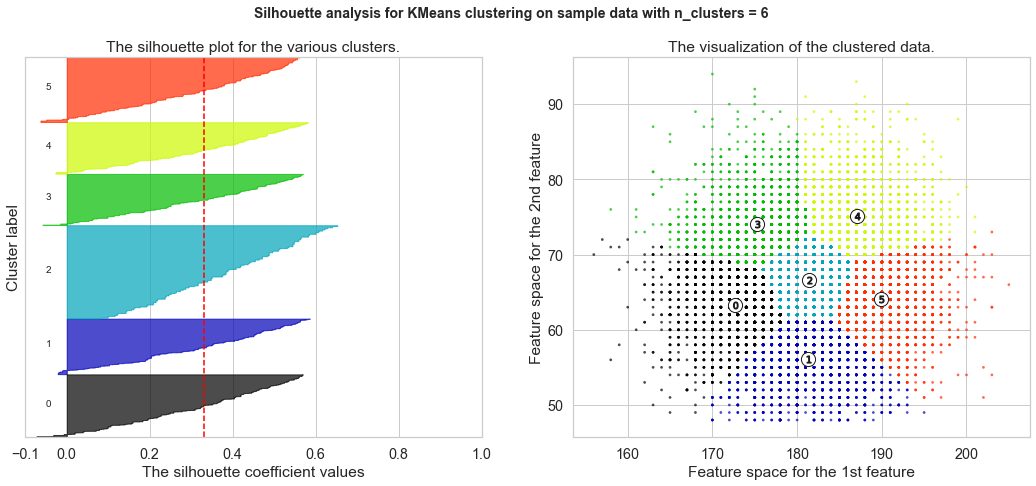

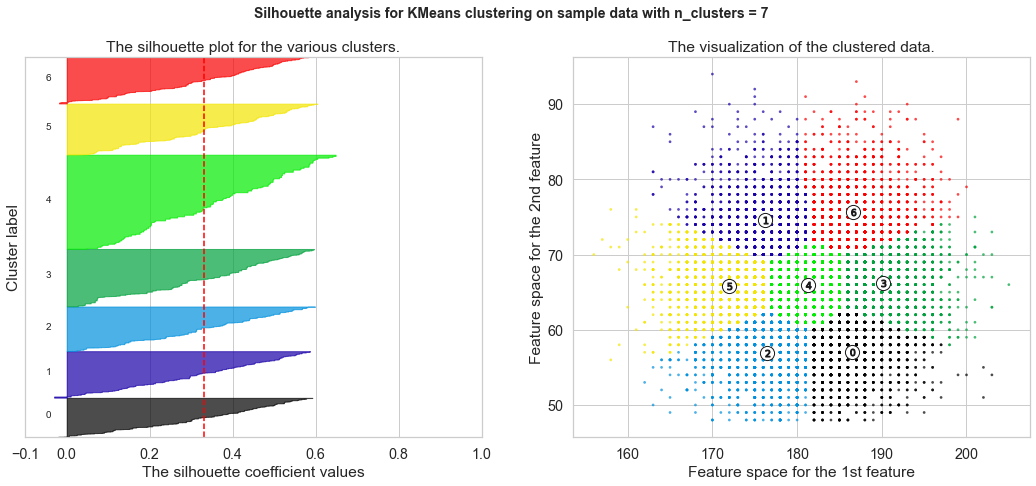

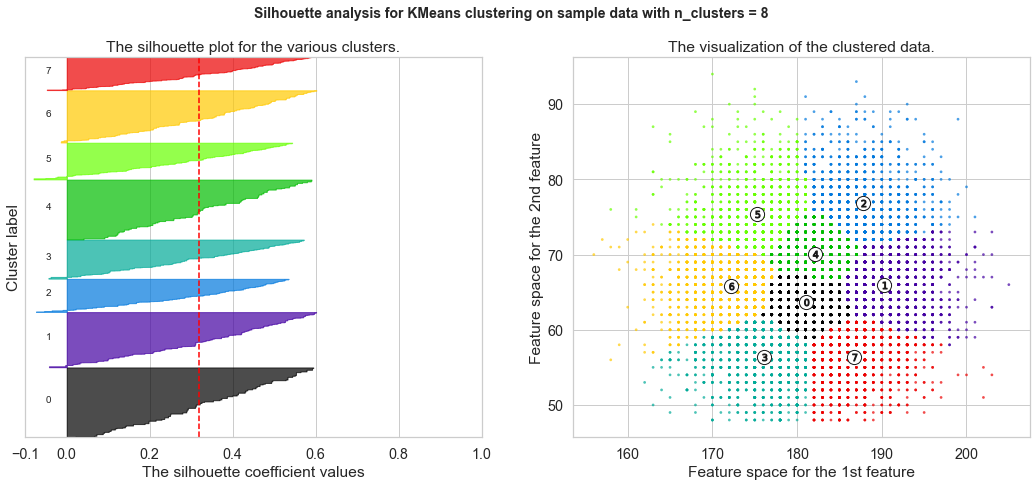

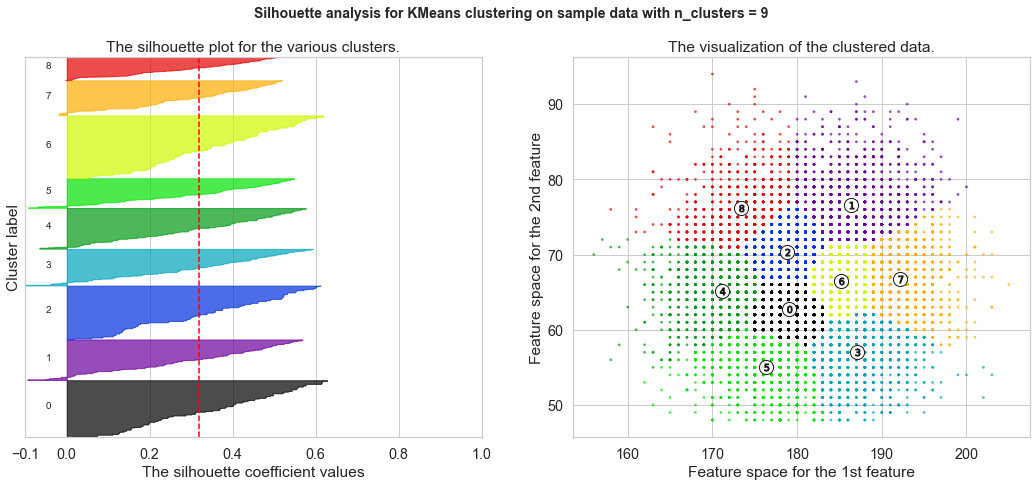

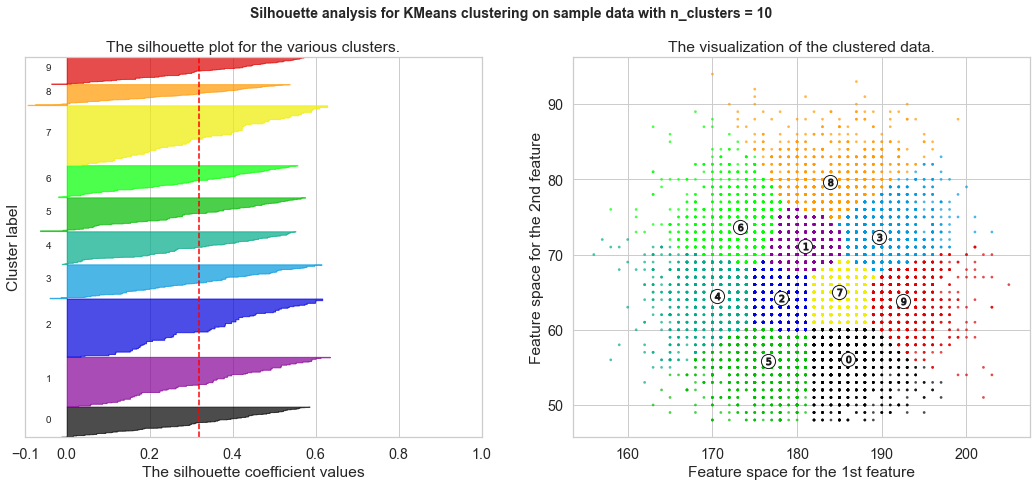

In [65]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

'''

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

'''

# print(X.shape)
# print(y.shape)


X = df_test
y = kmeans.labels_

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['height_cm'], X['overall'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()